<a href="https://colab.research.google.com/github/rahiakela/automl-experiments/blob/main/automated-machine-learning-with-autokeras/04-image-classification-and-regression/1_fine_tuning_powerful_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fine-tuning a powerful image classifier

The model we are going to create will classify images from a dataset called Canadian
Institute for Advanced Research, 10 classes (CIFAR-10). It contains 60,000 32x32 red,
green, blue (RGB) colored images, classified into 10 different classes. It is a collection of
images that is commonly used to train ML and computer vision algorithms.

<img src='https://github.com/rahiakela/automl-experiments/blob/main/automated-machine-learning-with-autokeras/04-image-classification-and-regression/images/1.png?raw=1' width='800'/>

This a problem considered already solved. It is relatively easy to achieve a classification
accuracy close to 80%. For better performance, we must use deep learning CNNs with
which a classification precision greater than 90% can be achieved in the test dataset. Let's
see how to implement it with AutoKeras.

This is a classification task, so we can use the ImageClassifier class. This class
generates and tests different models and hyperparameters, returning an optimal classifier
to categorize each image with its corresponding class.

##Setup

In [ ]:
!pip3 -q install autokeras

In [10]:
import matplotlib.pyplot as plt
import autokeras as ak
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import callbacks as tf_callbacks
from tensorflow.keras.utils import plot_model

import tensorflow as tf

import numpy as np

In [11]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

##Getting the CIFAR-10 dataset

We have to first load the CIFAR-10 dataset in
memory and have a quick look at the dataset shape.

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape) 
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Although it is a well-known machine learning dataset, it is always important to ensure
that the data is distributed evenly, to avoid surprises.

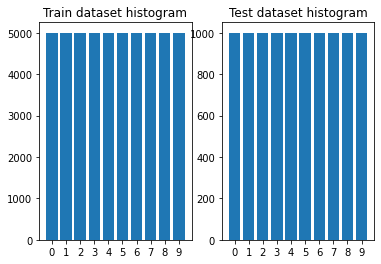

In [13]:
train_histogram = np.histogram(y_train)
test_histogram = np.histogram(y_test)

_, axs = plt.subplots(1, 2)
axs[0].set_xticks(range(10))
axs[0].bar(range(10), train_histogram[0])
axs[0].set_title('Train dataset histogram')

axs[1].set_xticks(range(10))
axs[1].bar(range(10), test_histogram[0])
axs[1].set_title('Test dataset histogram')
plt.show()

##Creating and training the models

We will now use the AutoKeras ImageClassifier class to find the best classification
model. Just for this little example, we set max_trials (the maximum number of
different Keras models to try) to 2, and we do not set the epochs parameter so that it will
use an adaptive number of epochs automatically. For real use, it is recommended to set
a large number of trials.

In [ ]:
#Initialize the ImageClassifier
clf = ak.ImageClassifier(max_trials=1)
# Search for the best model
clf.fit(x_train, y_train)

As it has to process thousands of color images, the models that AutoKeras will generate
will be more expensive to train, so this process will take hours, even using graphics
processing units (GPUs). We have limited the search to five architectures (max_trials
= 5). Increasing this number would give us a more accurate model, although it would
also take longer to finish.

##Improving the model performance